## Łukasz Szyszka Piątek 08:00

# TEMAT №10 Szeregi czasowe (ang. time series)

 
 ### Czym są szeregi czasowe? 
 Szereg czasowy jest zbiorem obserwacji dokonywanych w równych odstępach czasu. 
 Służy do przewidywania przyszlych wartości w oparciu o poprzednie obserwacje, do których zalicza się;
 - prognozowania biznesowe (kursy walut, giełda...)
 - zrozumienia przeszlych zachowań i zaobserwowania przyszlych;
 - oszacowanie bieżących osiągnięć.
 
 Do analizy i prognozowania szeregów czasowych w Python stosowano bibliotekę  statsmodels.tsa.api, która zawiera modele i metody szeregów czasowych. Importowane kanonicznie przy użyciu importu statsmodels.tsa.api jako tsa.
API skupia się na modelach i najczęściej używanych testach statystycznych oraz narzędziach. Ścieżki importu i struktura wyjaśnia projekt dwóch modułów API i jak importowanie z API różni się od bezpośredniego importowania z modułu, w którym zdefiniowany jest model. Więcej informacji znajdziesz w dokumentacji https://www.statsmodels.org/stable/api.html. 
##### Podstawowe komponenty szeregów czasowych:
- trend
- sezonowość
- cykliczność
#### Co to jest Stacjonarność?
Szereg czasowy jest stacjonarny gdy z biegiem czasu zachowuje sie w sposów szczególny, istnieje bardzo duże prawdopodobieństwo, że w przyszlości będę postepować tak samo.
#### Sprawdzić szereg na stacjonarność można za pomocą:
- Rozszerzonego testu Dickeya-Fullera (ADF)
- Przekształcenia logarytmicznego (Box-Cox)
- Dekompozycji trendu sezonowego
- Usuwania trendów poprzez różnicowanie
- Naprawiania niestałej wariancji + usuwanie trendu.
#### Co wskazuje że szereg jest stacjonarnym:
- stała średnia;
- stala wariancja;
- autokowariancja jest niezależna od czasu.



## Czym jest autoregresja? 
Podstawowa koncepcja polega na tym, że prognozujemy interesujące szeregi czasowe y  zakładając, że mają one liniową zależność z innymi szeregami czasowymi x.
Autoregresja – to jest regresja statystyczna w której zmienna objaśniana jest przyszłą wartością ciągu, a zmienna objaśniająca to wartości ciągu czasowego z przeszłości. 
Zmienna prognozowana y jest nazywana także zależną lub objaśnianą. Zmienne predyktorów x są nazywane zmiennymi niezależnymi lub objaśniającymi.
Na przykład możemy prognozować miesięczną sprzedaż y, korzystając z całkowitych wydatków na reklamę x jako predyktora. Albo możemy prognozować dzienne zapotrzebowanie na energię elektryczną y używając temperatury x1 i dnia tygodnia x2 jako predyktorów.

###  Najczęściej stosowane modele statystyczne do prognozowania szeregów czasowych

#### - Wygładzanie wykładnicze 
Metoda obróbki szeregu czasowego zmniejszająca jego wariancję za pomocą ważonej średniej ruchomej z przeszłych wartości, o wagach malejących wykładniczo wraz z odległością w czasie. Stosowana do prostego usuwania szumu lub wizualizacji różnych danych. Jest również przydatna w prognozowaniu szeregów czasowych o niewielkim stosunku sygnału do szumu, szczególnie niemających wyraźnego trendu i wahań sezonowych.


#### - AR (model autoregresyjny)
Modele, w których bieżące wartości szeregu wyrażają się jako liniowe funkcje poprzednich obserwacji, nazywają się modelami autoregresji. Jeżeli bieżąca wartość ciągu xn zależy liniowo tylko od jednej poprzedniej wartości x_(n-1), to taki model jest modelem autoregresji pierwszego rzędu, co oznaczamy jako AR(1). Jeżeli bieżąca wartość ciągu xn zależy liniowo od p poprzednich wartości xn-1,…,xn-p, to taki model jest modelem autoregresji rzędu p, AR(p). 


#### - MA (model średniej ruchomej)
Proces ze średnią ruchomą, jest regresją liniową bieżącej wartości szeregów w odniesieniu do poprzednich wartości błędu, związanych z białym szumem lub przypadkowymi zaburzeniami. Zakłada się, że takie przypadkowe zaburzenia w każdym z punktów pochodzą z tego samego rozkładu, zwykle rozkładu normalnego z zerową wartością oczekiwaną i stałą wariancją. 


#### - ARMA (model autoregresji ze średnią ruchomą)-  obejmuje dwa proste modele ciągów czasowych AR oraz MA. 
Użyteczność modeli ARMA polega na ich oszczędnej reprezentacji. Podobnie jak w przypadku AR i MA, właściwości modeli ARMA można zwykle scharakteryzować za pomocą ich funkcji autokorelacji. Modele ARMA są używane do opisu stacjonarnych ciągów czasowych. Także niektóre rodzaje niestacjonarności można sprowadzać do procesów stacjonarnych przez tworzenie procesów różnic i dalej stosować np.  modele ARMA.


#### - ARIMA (zintegrowany model autoregresji ze średnią ruchomą)
jest złożony z następujących elementów: autoregresja (AR), całkowanie (I) oraz średnia ruchoma (MA). ARIMA jest formą analizy regresji, która mierzy siłę jednej zmiennej zależnej w stosunku do innych zmiennych. Model ten jest szeroko stosowany do prognozowania przyszłych wartości danych, badając różnice między wartościami w ciągach zamiast wartości oryginalnych. Modele zintegrowane służą do opisów procesów stochastycznych niestacjonarnych.
ARIMA z parametrami p, d i q, gdzie:
p - liczba opóźnień obserwacji w modelu.
d - stopień różnicy.
q - zakres średniej ruchomej.


## Dobór modelu

#### 1. Test ADF (rozszerzony test Dickeya-Fullera)
Dla sprawdzenia stacjonarności ciągu robimy analizę za pomocą rozszerzonego testu Dickeya Fullera (ADF). Przy analizie testu ADF warto zwrócić uwagę, że hipoteza zerowa wskazuje na istnienia niestacjonarności. Jeżeli obliczona wartość p jest mniejsza od zadanej alfa, to ta hipoteza zerowa zostaje odrzucona, a ciąg  jest stacjonarny. W przeciwnym razie dane są niestacjonarne.

#### 2. ACF i PACF 

Autokorelacja i autokorelacja cząstkowa to miary związków między bieżącymi i przeszłymi wartościami szeregów określające, które przeszłe wartości szeregów są najbardziej użyteczne przy przewidywaniu przyszłych wartości. Dzięki tej wiedzy można określić kolejność procesów w modelu ARIMA. Dokładniej rzecz ujmując:

##### Funkcja autokorelacji (ACF).
Przy przesunięciu k jest to korelacja między wartościami szeregu oddalonymi o k przedziałów od siebie.
Występuje wtedy, gdy skutki działania zmienności losowej nie wygasają w danym okresie t, lecz są przenoszone na okresy przyszłe. 
plot_acf()
http://drizzt.home.amu.edu.pl/images/DADA/W7.pdf

##### Funkcja autokorelacji cząstkowej (PACF). 
jak sama nazwa wskazuje, PACF jest podzbiorem funkcji autokorelacji (ACF). Przy przesunięciu k jest to korelacja między wartościami szeregu oddalonymi o k przedziałów od siebie, z jednoczesną rejestracją wartości z przedziałów znajdujących się pomiędzy.
ACF i PACF stosowane są do wyboru rzędu modeli.  PACF pokazuje zależność między xn a poprzednimi wartościami, pomijając wpływ pośrednich opóźnień.
plot_pacf()

Oś x wykresu ACF wskazuje przesunięcie, dla jakiego obliczana jest autokorelacja; oś y wskazuje wartość korelacji (między −1 a 1). Na przykład linia rzutowania przy przesunięciu wynoszącym 1 na wykresie ACF oznacza silną korelację między każdą wartością szeregu a wartością poprzedzającą, zaś linia rzutowania przy przesunięciu wynoszącym 2 oznacza silną korelację między każdą wartością a wartością występującą dwa punkty wcześniej itd.
Korelacja dodatnia oznacza, że duże wartości bieżące odpowiadają dużym wartościom dla danego przesunięcia; ujemna korelacja oznacza, że duże wartości bieżące odpowiadają niewielkim wartościom dla danego przesunięcia.
Wartość bezwzględna korelacji stanowi miarę siły powiązania, przy czym większe wartości bezwzględne oznaczają silniejsze relacje.

#### 3. AIC (kryterium informacyjne Akaikego)
jest estymatorem błędu predykcji w próbie, a tym samym względnej jakości modeli statystycznych dla danego zbioru danych. Jest to jeden ze wskaźników dopasowania modelu, który stosuje się do wyznaczenia miary jakości modeli statystycznych dla badanego zbioru danych. To jak błąd średniokwadratowy w autoregresji — im mniejsza liczba, tym lepiej jest dopasowany model. Na ogół model o większej liczbie predyktorów (parametrów) daje dokładniejsze przewidywania, ponadto ma większą skłonność do przeuczenia. Kryteria informacyjne są nazywane metodami porównywania modeli dla zmiennej zależnej, i stosowane są do wyboru najlepszego modelu.



## Biblioteki

- pip install numpy scipy scikit-learn  #--- to the anaconda terminal
- pip install --user pmdarima   #---installing auto-arima
- pip install -U statsmodels   #---instaling  statsmodels
- import pandas as pd
- from pandas import DataFrame
- import datetime 
- from matplotlib import pyplot
- import matplotlib.pyplot as plt
- from statsmodels.tsa.stattools import adfuller
- from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
- from statsmodels.tsa.arima.model import ARIMA
- import pmdarima as pm
- from pmdarima import model_selection
- import numpy as np
- %matplotlib inline


# Zadanie do ćwiczenia   
### Na podstawie danych zawartych w pliku analiza.csv wykonaj następne punkty:
#### 1) Zaimportuj niezbędne biblioteki do szeregów czasowych (https://www.statsmodels.org/stable/api.html), a także biblioteki do operacji na danych oraz tworzenia wykresów.
#### 2) Odczytaj dane z pliku analiza.csv. Pomocne w interpretacji danych są metody: head(), describe(), len(), shape.
#### 3) Wykonaj wstępny wykres uzyskanych danych (typu "scatter") https://miroslawmamczur.pl/006-wykres-rozrzutu-scatter-plot/
#### 4) Oblicz ADF (p-value, 'ADF Statistic)
#### 5) Wykonaj wykres ACF
#### 6) Wykonaj wykres PACF
#### 7) Podzieł szereg na dane na treningowe i testowe oraz oblicz kryterium  AIC dla modelu ARIMA (3,0.1) (results.summary())
#### 8) Za pomocą funkcji AUTO-ARIMA dobierz najlepszy model dla prognozy.
#### 9) Zrób wykreś do prognozy
#### 10) Wnioski

# Rozwiązanie 

###  1) Zaimportuj niezbędne biblioteki do szeregów czasowych a także biblioteki do operacji na danych oraz tworzenia wykresów


In [100]:
import numpy as np
from pmdarima import model_selection
import pmdarima as pm
import pandas as pd
from pandas import DataFrame
import datetime
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

### 2) Odczytaj dane z pliku analiza.csv. Pomocne w interpretacji danych są metody: head(), describe(), len(), shape.


In [101]:
import pandas 
df = pandas.read_csv("analiza.csv", sep = ",", decimal = ",")

display(df)
display(df.head(7))
display(df.describe())

print('\nLiczba wierszy:')
print(len(df))

print('\nWymiary bazy danych:')
print(df.shape)

,Data,Rezerwacja
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


,Data,Rezerwacja
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148


,Rezerwacja
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000



Liczba wierszy:
144

Wymiary bazy danych:
(144, 2)


### 3) Wykonaj wstępny wykres uzyskanych danych 


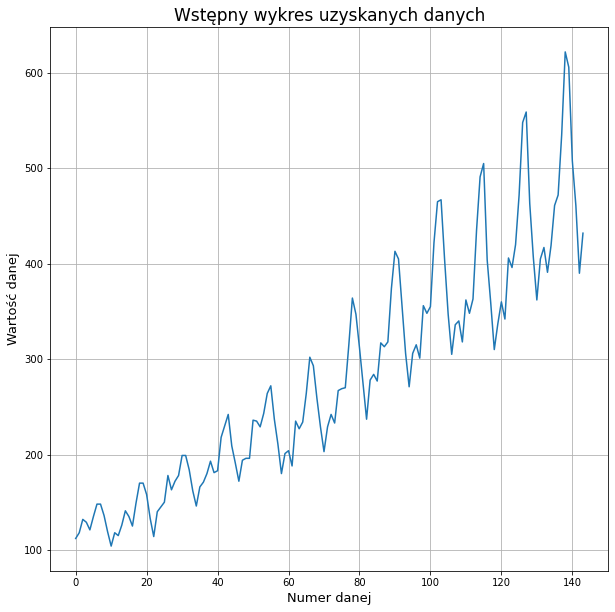

In [102]:
dane=df[['Rezerwacja']]

plt.figure(figsize=(10, 10))
plt.plot(dane)
plt.title('Wstępny wykres uzyskanych danych', fontsize=17)
plt.xlabel('Numer danej', fontsize=13)
plt.ylabel('Wartość danej', fontsize=13)
plt.grid('on')

### 4) Oblicz ADF

In [103]:
new_df = read_csv('analiza.csv', header=0, index_col=0)
result = adfuller(new_df.values)
print('Aproksymacja MacKinnona wartośći-p: %f' % result[1])
print('Statystyka testu: %f' % result[0])

Aproksymacja MacKinnona wartośći-p: 0.991880
Statystyka testu: 0.815369


### 5) Wykonaj wykres ACF


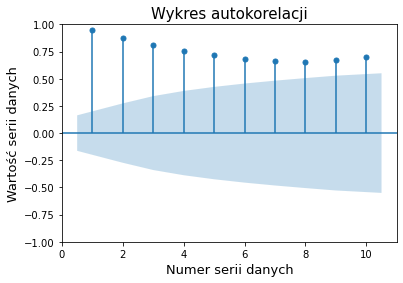

In [104]:
plot_acf(new_df, zero=False, lags=10)
plt.title('Wykres autokorelacji', fontsize=15)
plt.xlabel('Numer serii danych', fontsize=13)
plt.ylabel('Wartość serii danych', fontsize=13)
plt.show()

### 6) Wykonaj wykres PACF


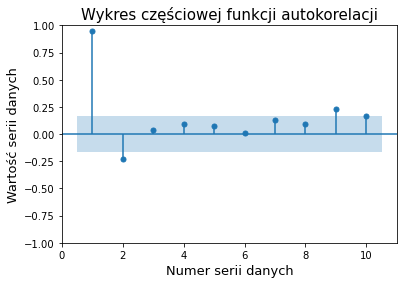

In [105]:
plot_pacf(new_df, zero=False, lags=10, method='ywm')
plt.title('Wykres częściowej funkcji autokorelacji', fontsize=15)
plt.xlabel('Numer serii danych', fontsize=13)
plt.ylabel('Wartość serii danych', fontsize=13)
plt.show()

### 7) Podzieł szereg na dane treningowe i testowe według uznania oraz oblicz kryterium  AIC dla modelu ARIMA (3,0,1) (results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   38
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -196.298
Date:                Sun, 11 Dec 2022   AIC                            404.596
Time:                        16:33:56   BIC                            414.421
Sample:                             0   HQIC                           408.092
                                 - 38                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        421.0466     24.456     17.216      0.000     373.114     468.980
ar.L1          0.3369      0.569      0.592      0.554      -0.778       1.452
ar.L2          0.4767      0.609      0.783      0.4

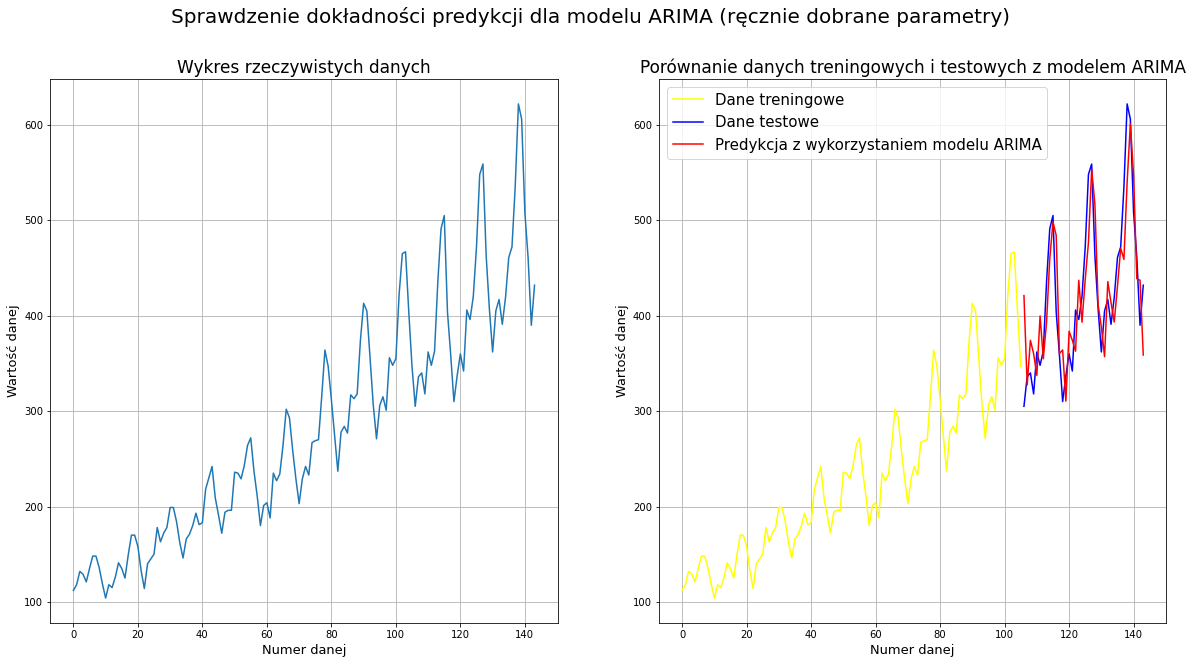

In [106]:
my_val = 106
X = new_df.values
train = X[0 : my_val] # dane treningowe
test = X[my_val : ]  #dane testowe
predictions = [train, test]
model = ARIMA(predictions[1], order=(3, 0, 1))
results = model.fit()
print(results.summary())

num_of_periods = len(test)
prediction_model = results.predict(n_periods=num_of_periods)

test_offset = 0
prediction_offset = 0

fig = plt.figure(figsize=(20, 10))
fig.suptitle('Sprawdzenie dokładności predykcji dla modelu ARIMA (ręcznie dobrane parametry)', fontsize=20)
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(X)
ax1.set_title('Wykres rzeczywistych danych', fontsize=17)
ax1.set_xlabel('Numer danej', fontsize=13)
ax1.set_ylabel('Wartość danej', fontsize=13)
ax1.grid('on')
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(train, color='yellow')
ax2.plot(np.arange(my_val, my_val + num_of_periods), test, color='blue')
ax2.plot(np.arange(my_val, my_val + num_of_periods), prediction_model, color='red')
ax2.set_title('Porównanie danych treningowych i testowych z modelem ARIMA', fontsize=17)
ax2.legend(['Dane treningowe', 'Dane testowe', 'Predykcja z wykorzystaniem modelu ARIMA'], fontsize=15)
ax2.set_xlabel('Numer danej', fontsize=13)
ax2.set_ylabel('Wartość danej', fontsize=13)
ax2.grid('on')
plt.show()

### 8) Za pomocą funkcji AUTO-ARIMA dobierz najlepszy model dla prognozy.

In [107]:
model_auto = pm.auto_arima(predictions[0], exogenous=None, seasonal=True, m=12, d=1, D=1,
                     max_p=4, max_q=3, trace=True, error_action='ignore',
                     suppress_warning=True)

print('\n', model_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=693.048, Time=0.35 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=694.203, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=690.179, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=690.593, Time=0.12 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=690.040, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=690.477, Time=0.06 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=691.996, Time=0.11 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=691.917, Time=0.03 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=691.455, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=690.190, Time=0.02 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=693.402, Time=0.06 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=691.769, Time=0.03 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 0.885 seconds

                                      SARIMAX Results                                 

Jak widać, najlepsze parametry modelu wskazane automatycznie wynoszą: (1, 1, 0)(0, 1, 0)[12]

# Wykonaj wykres prognozy

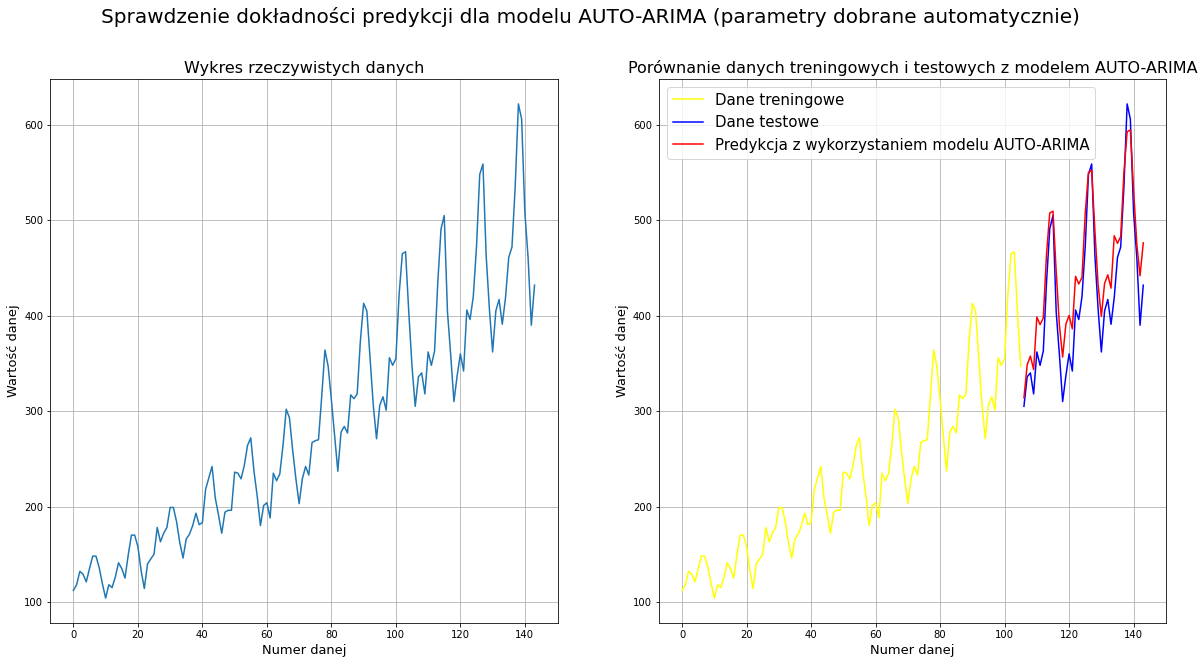

In [108]:
prediction_model = model_auto.predict(n_periods=num_of_periods)

fig = plt.figure(figsize=(20, 10))
fig.suptitle('Sprawdzenie dokładności predykcji dla modelu AUTO-ARIMA (parametry dobrane automatycznie)', fontsize=20)
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(X)
ax1.set_title('Wykres rzeczywistych danych', fontsize=16)
ax1.set_xlabel('Numer danej', fontsize=13)
ax1.set_ylabel('Wartość danej', fontsize=13)
ax1.grid('on')
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(train, color='yellow')
ax2.plot(np.arange(my_val, my_val + num_of_periods), test, color='blue')
ax2.plot(np.arange(my_val, my_val + num_of_periods), prediction_model, color='red')
ax2.set_title('Porównanie danych treningowych i testowych z modelem AUTO-ARIMA', fontsize=16)
ax2.legend(['Dane treningowe', 'Dane testowe', 'Predykcja z wykorzystaniem modelu AUTO-ARIMA'], fontsize=15)
ax2.set_xlabel('Numer danej', fontsize=13)
ax2.set_ylabel('Wartość danej', fontsize=13)
ax2.grid('on')
plt.show()

## Wnioski:

- Wykonanie tego ćwiczenia świetnie pokazuje jak istotne w języku Python jest umiejętne wykorzystanie dostępnych w jego ramach pakietów. Poza tak oczywistymi jak pakiet NumPy, bez którego ciężko wyobrazić sobie analizę danych w języku Python wykorzystany został tutaj także np. pakiet statsmodels, który pozwolił na wykonanie rozszerzonego testu Dickeya-Fullera, za pomocą jedynie jednej linijki kodu. Wykorzystanie takich bibliotek pozwala więc na dokonanie złożonych analiz danych przy jednoczensnym znaczącym skróceniu kodu.
- Pakiet statsmodels został wykorzystany także, w celu utworzenia wykresów ACF i PACF, które stanowią podstawę do dalszej analizy danych z wykorzystaniem modelu ARIMA.
- Warto także wspomnieć o pakiecie Matplotlib, który udostępnia użytkownikowi szeroki zakres wykresów, które może utworzyć. Dodatkowo każdy z tych wykresów może zostać odpowiednio zmodyfikowany wedle potrzeb i wizji programisty. Swoim działaniem w dużym stopniu przypomina środowisko Matlab, ale w mojej ocenie pakiet Matplotlib jest od niego wygodniejszy. Wynika to nie tylko z samej składni języka, ale także z bardziej intuicyjnego sposobu wprowadzania modyfikacji.
- Analizując wykresy dla modelów ARIMA oraz AUTO-ARIMA można zauważyć, że oba modele całkiem dobrze zaproksymowały dane testowe. Oba nie są jednak pozbawione wad. Model z ręcznym doborem parametrów lepiej oddaje kształt wykresu dla rzeczywistych danych, natomiast czasem przewiduje zbyt duże zmiany wartości. Model z automatycznym doborem parametrów jest pod tym względem "ostrożniejszy" - a więc nie przewiduje zbyt gwałtownych zmian wartości, czego konsekwencją jest czasem to, że zmiany wartości, które przewiduje są niewystarczające względem tych rzeczywistych.
- Można więc wysnuć wniosek, że prawidłowe dobranie parametrów dla modelu ARIMA jest bardzo ważne w kontekście jakości dokonanej aproksymacji danych. Im bardziej parametry modelu będą zbliżone do tych optymalnych, tym lepsza jakościowo będzie aproksymacja.